In [68]:
# Steps for Model Building
# 0. Convert your Business problem into a Data Problem
# 1. Load the dataset
# 2. Exploratory Data Analysis:
# 3. Bare minimum data cleaning (e.g. missing value imputation) & 
# preprocessing (e.g. Encoding the cat. variables)

# 4. Create Baseline models

# 5. Data Polishing/Refinement: e.g. outlier treatment, scaling the num. features,
# Feature engineering, feature selection, feature transformation, etc.

# ===> Data is FInalized!!
# 6. Compare and Select the best model(s) for "tuning" 

# 7. Hyper-parameter tuning / Model Refinement

# 8. Re-train you final model on the entire data, one last time!

# 9. Save the model (pickelize)

# 10. Share/Deploy the model

# y = f(X)

# Model = Algo(Data)


In [19]:
import pandas as pd
import numpy as np
df = pd.read_pickle("churn_prediction_v3.pkl")

In [20]:
categorical_cols = df.dtypes[df.dtypes == 'category'].index  # identifying the categorical variable
categorical_cols

Index(['gender', 'occupation', 'city', 'customer_nw_category', 'branch_code',
       'churn'],
      dtype='object')

In [21]:
for col in categorical_cols:  # list the number of unique values in these cat. columns
    print(col, ":", df[col].nunique())

gender : 2
occupation : 5
city : 1288
customer_nw_category : 3
branch_code : 2806
churn : 2


In [22]:
df.drop("city", axis=1, inplace=True)          # Dropping the columns, as it has just too many unique values
df.drop( 'branch_code', axis=1, inplace=True)  # Dropping the columns, as it has just too many unique values

In [23]:
df['gender'] = df['gender'].map({'Male':0, 'Female':1})  # Label Encoding the gender col. This can also be One-hot encoded

In [24]:
pd.get_dummies(df['occupation'], drop_first=True)   # OHE the occupation

,retired,salaried,self_employed,student
0,0,0,1,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
15924,0,1,0,0
15925,0,0,1,0
15926,0,1,0,0
15927,0,0,1,0


In [25]:
nominal_cols = ['occupation', 'customer_nw_category'] #, 'city', 'branch_code'] # Selecting out the columns for OHE    #  'city', 

In [26]:
df_new = pd.get_dummies(df, columns=nominal_cols) # One-Hot encoding the Nominal columns

In [27]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15929 entries, 0 to 15928
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   vintage                         15929 non-null  int64   
 1   age                             15929 non-null  int64   
 2   gender                          15929 non-null  category
 3   dependents                      15929 non-null  int64   
 4   current_balance                 15929 non-null  float64 
 5   previous_month_end_balance      15929 non-null  float64 
 6   average_monthly_balance_prevQ   15929 non-null  float64 
 7   average_monthly_balance_prevQ2  15929 non-null  float64 
 8   current_month_credit            15929 non-null  float64 
 9   previous_month_credit           15929 non-null  float64 
 10  current_month_debit             15929 non-null  float64 
 11  previous_month_debit            15929 non-null  float64 
 12  current_month_bala

In [81]:
# df_new[df_new.dtypes[df_new.dtypes == "bool"].index] = df_new[df_new.dtypes[df_new.dtypes == "bool"].index].astype("int")

In [28]:
df_new.to_pickle("cleaned_churn_dataset.pkl")

# Ensemble Models

### What are Ensemble Models?

Ensemble models in machine learning combine the decisions from multiple models to improve the overall performance. This approach is based on the premise that a group of weak learners can come together to form a strong learner. The individual models in an ensemble are known as base learners.

### Why Do We Need Them?

1. **Improved Accuracy**: Ensembles often provide better predictions and achieve higher accuracy than individual models. They are particularly effective in reducing variance and bias.

2. **Reduced Overfitting**: By averaging out biases and capturing more general patterns, ensembles can reduce the risk of overfitting compared to a single complex model.

3. **Increased Robustness**: Ensembles are less sensitive to the quirks of individual models and can provide more stable and reliable predictions.

4. **Handling Complexity**: They can model complex relationships in data by combining simpler models, which might not be possible with a single model.

### Different Techniques of Ensemble Models

1. **Bagging (Bootstrap Aggregation)**:
   - Combines predictions from multiple models trained on different random subsets of the training dataset.
   - Example: Random Forest.

2. **Boosting**:
   - Sequentially trains models, where each model learns from the errors of its predecessor, emphasizing the instances that previous models misclassified.
   - Example: XGBoost, LightGBM, CatBoost.

3. **Stacking (Stacked Generalization)**:
   - Trains multiple models on the same dataset and then trains a meta-model to combine their predictions.
   - Example: Stacked ensemble of different algorithms like decision trees, SVMs, and neural networks.

4. **Voting**:
   - Simplest form of ensembling, combining predictions from multiple models. It can be majority voting (classification) or averaging/weighted averaging (regression).

5. **Blending**:
   - Similar to stacking but uses a validation set to train the meta-model instead of out-of-fold predictions.

The choice of the right ensemble technique depends on the specific problem, the nature of the data, and the desired balance between bias and variance.

### Problems Solved by Boosting vs Bagging Algorithms

1. **Boosting**:
   - **Problem Addressed**: Primarily reduces bias and builds strong predictive models. It sequentially focuses on difficult-to-classify instances, improving the model's performance on these cases.
   - **Example**: AdaBoost, Gradient Boosting, XGBoost.
   - **Use Cases**: Works well with weak base learners and in scenarios where bias reduction is crucial.

2. **Bagging**:
   - **Problem Addressed**: Aims to reduce variance and prevent overfitting. It involves training base learners on different subsets of the original dataset and then averaging their predictions.
   - **Example**: Random Forest, ExtraTrees
   - **Use Cases**: Effective in high-variance scenarios and when the base learners are complex models like decision trees.


### Advantages of Ensemble Models:

1. **Improved Accuracy**: Combining multiple models often leads to better predictions and higher accuracy than individual models, especially when the models complement each other's strengths.

2. **Reduced Overfitting**: Ensemble methods, particularly those involving bagging or averaging approaches (like Random Forest), can reduce the risk of overfitting, as they average out biases and are less sensitive to noise in the training data.

3. **Handling Non-Linearity**: Ensembles can capture complex, non-linear relationships in the data that might be missed by individual models.

4. **Increased Robustness**: Ensemble methods are generally more robust and less sensitive to errors in individual models. This robustness comes from the aggregation of diverse predictions.

5. **Model Diversity**: Ensembles can combine different types of models, leading to a diversity that can capture a wide range of patterns in the data.

6. **Improved Performance on Imbalanced Datasets**: Techniques like boosting can focus on the harder-to-classify examples, thereby improving performance on imbalanced datasets.

### Disadvantages of using Ensemble Models:

1. **Increased Complexity**: Ensemble models are typically more complex to understand, implement, and interpret than individual models.

2. **Higher Computational Cost**: They generally require more computational resources and time to train, especially if the ensemble size is large.

3. **Risk of Overfitting with Boosting**: Although ensembles like Random Forests reduce the risk of overfitting, boosting methods (e.g., AdaBoost, Gradient Boosting) can overfit the training data if not carefully tuned.

4. **Model Interpretability**: As the complexity of the model increases with ensembling, it becomes more challenging to interpret the model and understand the reasoning behind specific predictions.

5. **Tuning Difficulty**: Ensemble methods introduce additional hyperparameters (like the number of models in the ensemble), which can make the process of model tuning more complex.

6. **Dependency on Base Models**: The performance of an ensemble is limited by the performance of its base models. If the base models are too weak or too correlated, the ensemble's performance may not be optimal.

Hence, while ensemble models can provide significant improvements in prediction accuracy and robustness, they come with increased complexity, computational costs, and potential challenges in interpretation and tuning. The choice to use ensemble models should be guided by the trade-off between these factors and the specific requirements of the problem at hand.

# Comparing Gradient Boosting & AdaBoost

| Feature/Aspect             | Gradient Boosting                                        | AdaBoost                                                   |
|----------------------------|----------------------------------------------------------|------------------------------------------------------------|
| **Basic Concept**          | Builds an additive model in a forward stage-wise fashion, optimizing arbitrary differentiable loss functions. | Boosts the performance of decision trees on binary classification problems by focusing on misclassified instances in training. |
| **Algorithm Type**         | General approach that can be used with any differentiable loss function. | Initially designed for classification problems, but can be extended to regression. |
| **Weight Update Mechanism**| Adjusts the model by fitting the new predictor to the residual errors made by the previous predictor. | Adjusts the weights of incorrectly classified instances, making them more likely to be correctly classified in the next round. |
| **Learning Rate**          | Uses a learning rate to shrink the contribution of each tree to prevent overfitting. | Does not inherently use a learning rate; instead, it adjusts weights after each iteration based on error. |
| **Base Learner**           | Typically decision trees (can be shallow, like stumps, or deeper). | Often uses decision stumps (single-level decision trees) as the weak learners. |
| **Loss Function Adaptation**| Can optimize different loss functions (squared error, logistic loss, etc.). | Focuses on exponential loss function. |
| **Flexibility**            | More flexible, as it works with various loss functions and allows for more complex base learners. | Less flexible with respect to the choice of loss function and base learner. |
| **Robustness to Overfitting**| Has mechanisms to prevent overfitting (like using subsamples of data, smaller learning rates, or limiting the number of trees). | Can overfit if the number of weak learners is too high, especially in the presence of noise. |
| **Speed and Scalability**  | Can be slower and more computationally intensive due to deeper trees and sequential building of models. | Generally faster and less computationally expensive as it often uses simpler base models. |
| **Use Cases**              | Broad range of applications in regression, classification, ranking, etc. | Mainly used in classification problems but can be adapted for regression. |



# Comparing XGBoost, LightGBM, and CatBoost:


| Feature                   | XGBoost                          | LightGBM                         | CatBoost                         |
|---------------------------|----------------------------------|----------------------------------|----------------------------------|
| **Full Name**             | eXtreme Gradient Boosting        | Light Gradient Boosting Machine  | Categorical Boosting             |
| **Developer**             | Developed by Tianqi Chen         | Microsoft                        | Yandex                           |
| **Release Year**          | 2016                             | 2017                             | 2017                             |
| **Algorithm**             | Gradient boosting decision trees | Gradient boosting decision trees | Gradient boosting decision trees |
| **Key Features**          | - Regularization capabilities<br>- Robust handling of missing values<br>- Tree pruning based on depth-first approach | - Faster training on large datasets due to histogram-based splits<br>- Leaf-wise tree growth which can result in better performance<br>- Lower memory usage | - Specialized handling of categorical features without need for explicit pre-processing<br>- Robust to overfitting with small datasets<br>- Advanced handling of categorical features |
| **Handling Categorical Features** | Requires pre-processing (like one-hot encoding) | Requires pre-processing (like one-hot encoding) | Directly handles categorical features with no need for explicit pre-processing |
| **Speed and Scalability** | Slower than LightGBM but very efficient on small to medium datasets | Very fast, especially on large datasets due to histogram-based algorithms | Competitively fast, efficient in memory usage, especially with categorical data |
| **Ease of Use**           | Easy to use with extensive documentation and community support | Slightly more complex due to additional parameters for tuning | User-friendly with less need for hyper-parameter tuning |
| **Model Interpretability**| Good with various tools available for visualization | Good with tools for visualization but might be less interpretable due to complex leaf-wise growth | Good with detailed explanations for model predictions |
| **Regularization**        | Supports both L1 (Lasso regression) and L2 (Ridge regression) regularization to prevent overfitting | Limited regularization options compared to XGBoost | Provides a form of regularization to prevent overfitting |
| **Community and Support** | Very popular with a large community, extensive documentation | Growing popularity, good community support | Gaining popularity, especially in the European market, with good documentation |
| **Use Case Scenarios**    | - Small to medium data sets<br>- Scenarios requiring fine-tuned models | - Large datasets and scenarios where training speed is crucial<br>- Situations where memory efficiency is important | - Datasets with a high proportion of categorical features<br>- When model interpretability is important<br>- Scenarios with smaller datasets where overfitting might be a concern |

Each of these frameworks has its strengths and is better suited to certain types of data and problem scenarios. The choice between them can depend on factors like dataset size, the proportion of categorical features, need for model interpretability, and computational resources.

In [1]:
# %%capture
# !pip install xgboost lightgbm catboost

In [31]:
import pandas as pd
import numpy as np
import xgboost as xgb
import lightgbm as lgb
import catboost as cb

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import ExtraTreeClassifier

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [32]:
df = pd.read_pickle("cleaned_churn_dataset.pkl")
X = df.drop('churn', axis=1)  # Features matrix
y = df['churn']   # Target variable for Regression

X.head()

,vintage,age,gender,dependents,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,...,current_month_balance,previous_month_balance,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student,customer_nw_category_1,customer_nw_category_2,customer_nw_category_3
0,2401,66,0,0,1458.71,1458.71,1458.71,1449.07,0.20,0.20,...,1458.71,1458.71,0,0,0,1,0,0,1,0
1,2648,35,0,0,5390.37,8704.66,7799.26,12419.41,0.56,0.56,...,6496.78,8787.61,0,0,0,1,0,0,1,0
2,2494,31,0,0,3913.16,5815.29,4910.17,2815.94,0.61,0.61,...,5006.28,5070.14,0,0,1,0,0,0,1,0
3,2629,90,0,1,2291.91,2291.91,2084.54,1006.54,0.47,0.47,...,2291.91,1669.79,0,0,0,1,0,0,1,0
4,1879,42,0,2,927.72,1401.72,1643.31,1871.12,0.33,714.61,...,1157.15,1677.16,0,0,0,1,0,0,0,1


In [91]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [92]:
y_train.value_counts(normalize=True)

0.0   0.81
1.0   0.19
Name: churn, dtype: float64

In [93]:
y_test.value_counts(normalize=True)

0.0   0.81
1.0   0.19
Name: churn, dtype: float64

In [116]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(solver="liblinear", class_weight="balanced")  # "untrained" model
LR.fit(X_train, y_train)  # model is trained now  >>> fitting means model training here.
# Always fit your model on the training set

LogisticRegression(class_weight='balanced', solver='liblinear')

In [117]:
LR.score(X_train, y_train)   # Accuracy score of the model on the training set

0.8117397787020325

In [118]:
LR.score(X_test, y_test)   # Accuracy score of the model on the TEST set

0.7991211550533585

In [119]:
# Set the display option
pd.set_option('display.float_format', '{:.2f}'.format)

In [120]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report

In [121]:
y_pred = LR.predict(X_test)
accuracy_score(y_pred,y_test)

0.7991211550533585

In [122]:
confusion_matrix(y_test, y_pred)

array([[2180,  409],
       [ 231,  366]], dtype=int64)

In [123]:
print(classification_report(y_test, y_pred) ) #  target_names=["No Churn", "Churn"]) )

              precision    recall  f1-score   support

         0.0       0.90      0.84      0.87      2589
         1.0       0.47      0.61      0.53       597

    accuracy                           0.80      3186
   macro avg       0.69      0.73      0.70      3186
weighted avg       0.82      0.80      0.81      3186



In [124]:
f1_score(y_test, y_pred)

0.5335276967930029

In [144]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=4, min_samples_split=300, min_samples_leaf =100,
                                    random_state=1)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=100, min_samples_split=300,
                       random_state=1)

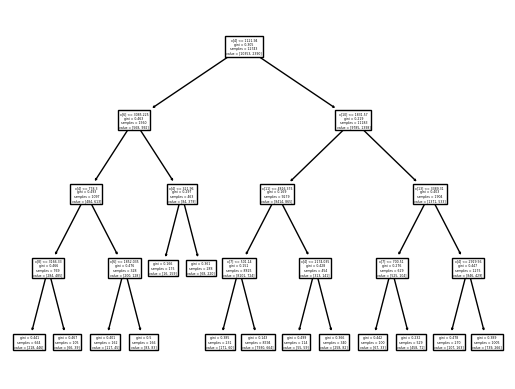

In [145]:
import matplotlib.pyplot as plt
from sklearn import tree

tree.plot_tree(tree_model)
#plt.savefig('images/03_21_1.pdf')
plt.show()

In [146]:
# !pip install pydotplus

In [147]:
# Install pydotplus
# 1. Install Graphviz from https://graphviz.org/download/
# 2. Set the environment variables and add Graphviz .exe file path to the PATH variable
# 3. pip install graphviz

In [148]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree_model,
                           filled=True, 
                           rounded=True,
                           class_names=['No Churn', 
                                        'Churn'],
                           feature_names=list(X_train.columns),
                           out_file=None) 
graph = graph_from_dot_data(dot_data) 
graph.write_png('tree.png') 

True

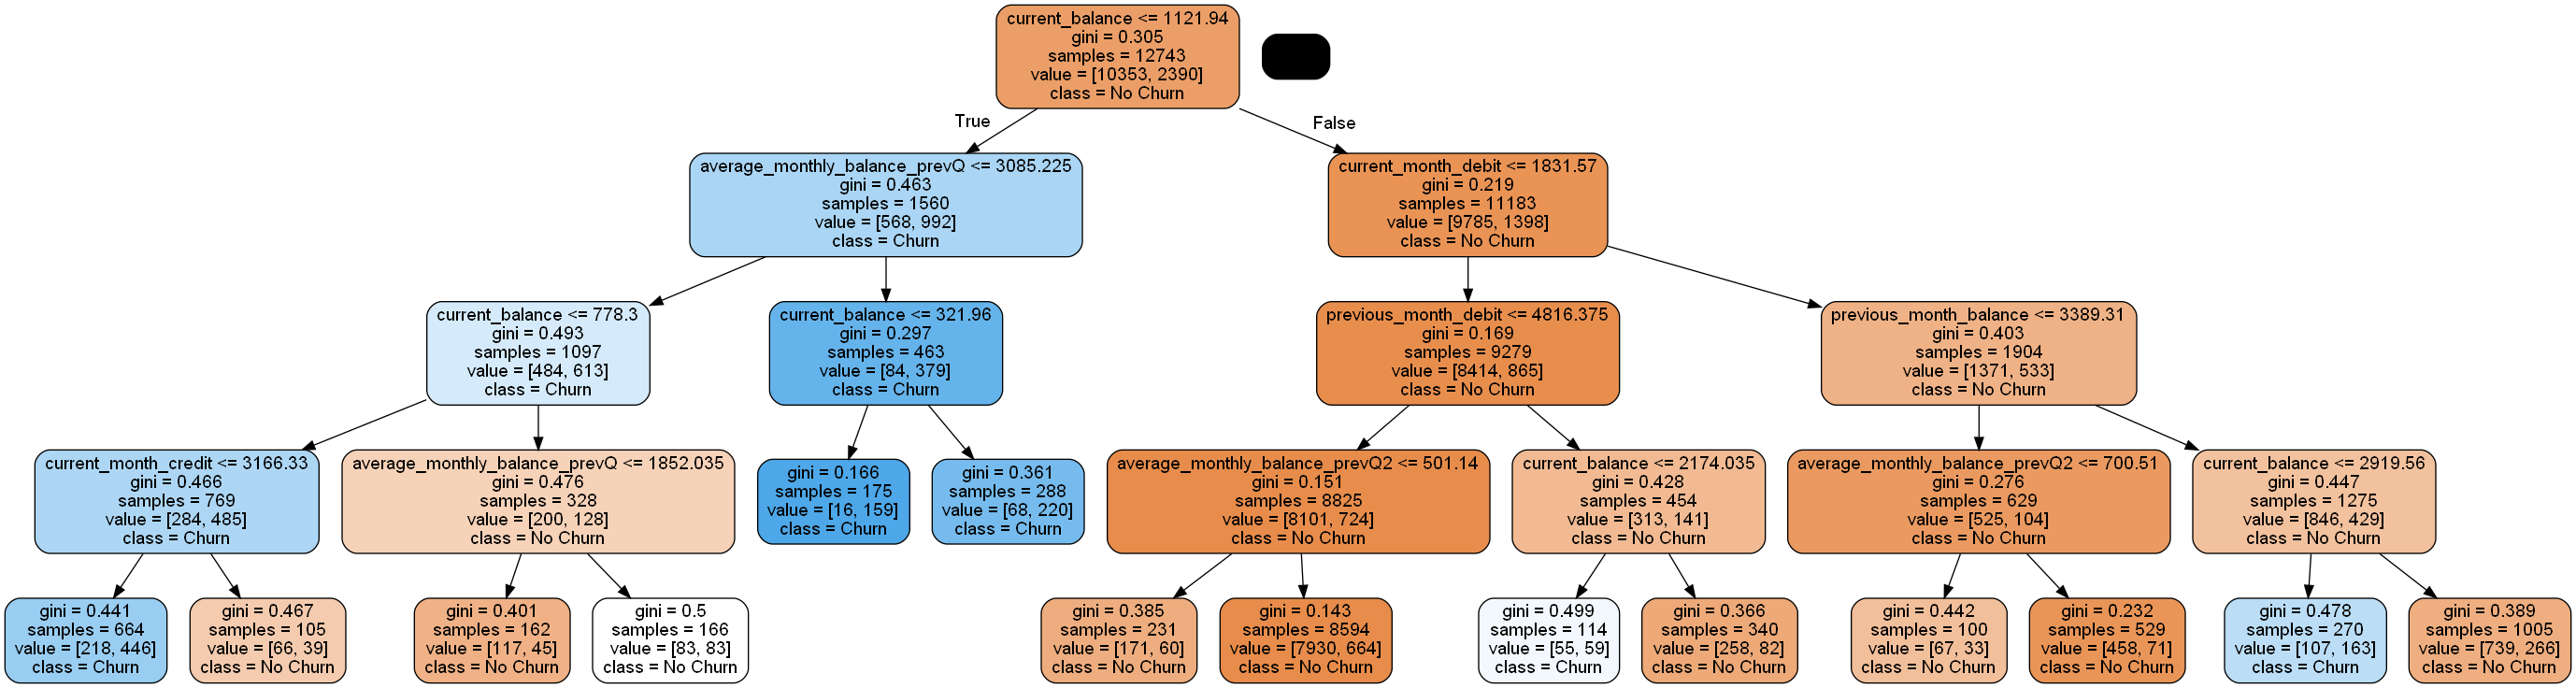

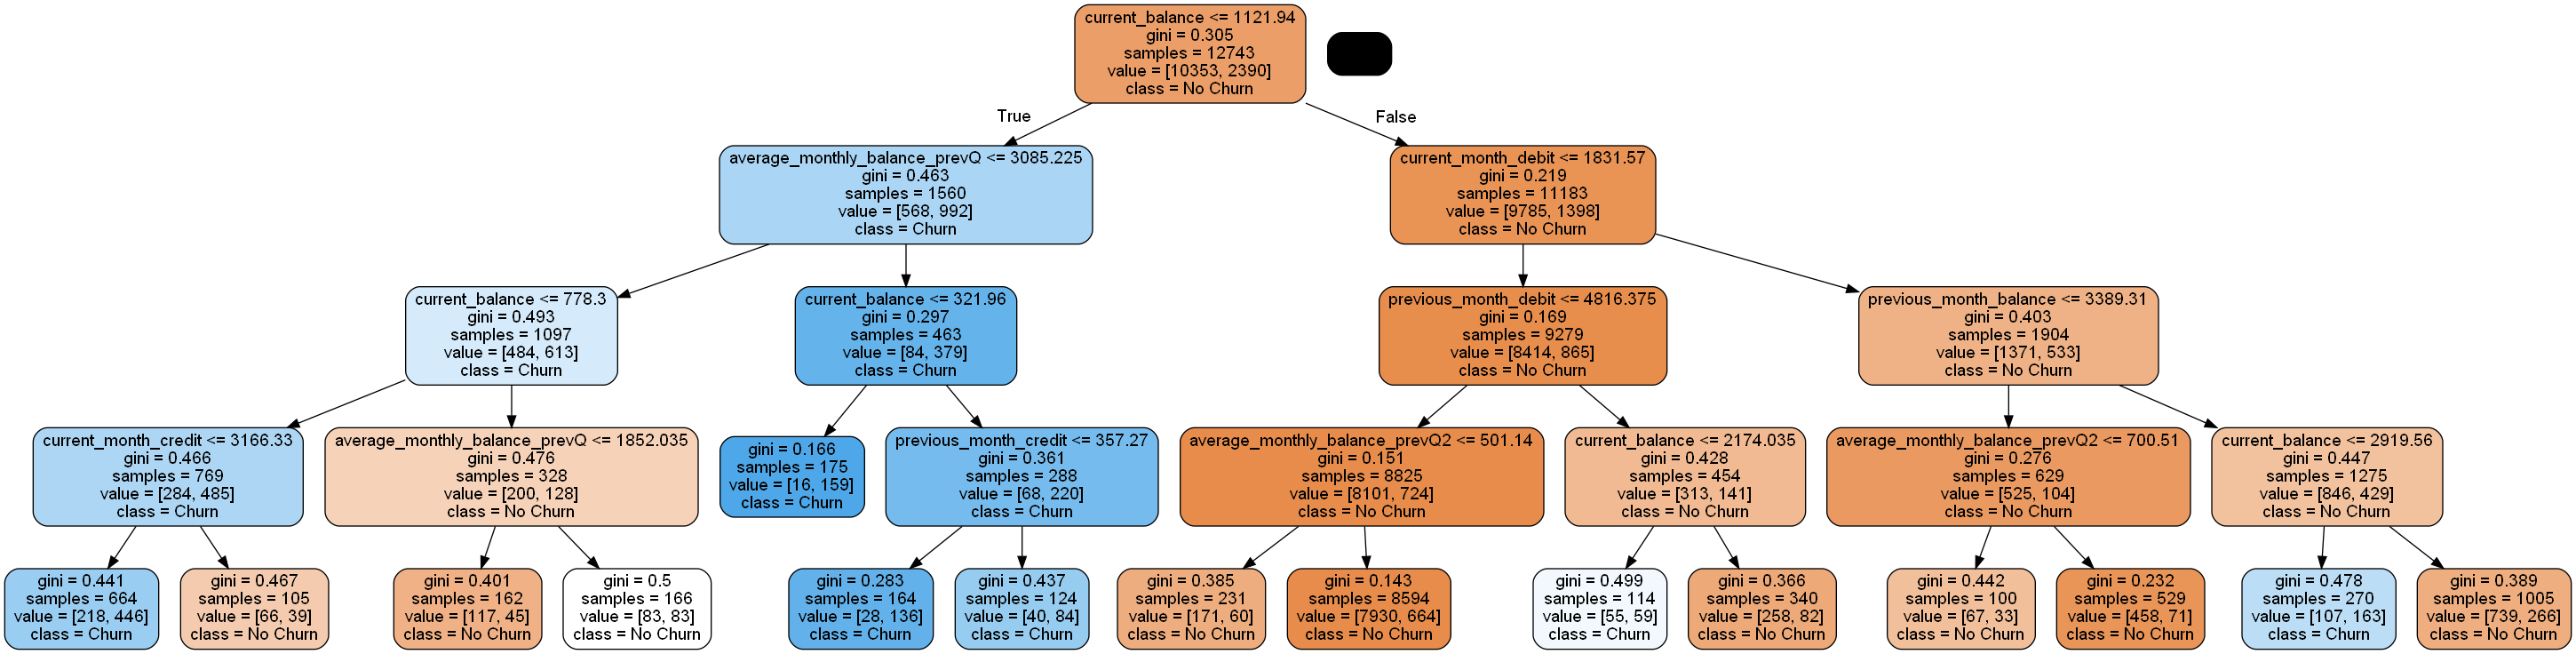

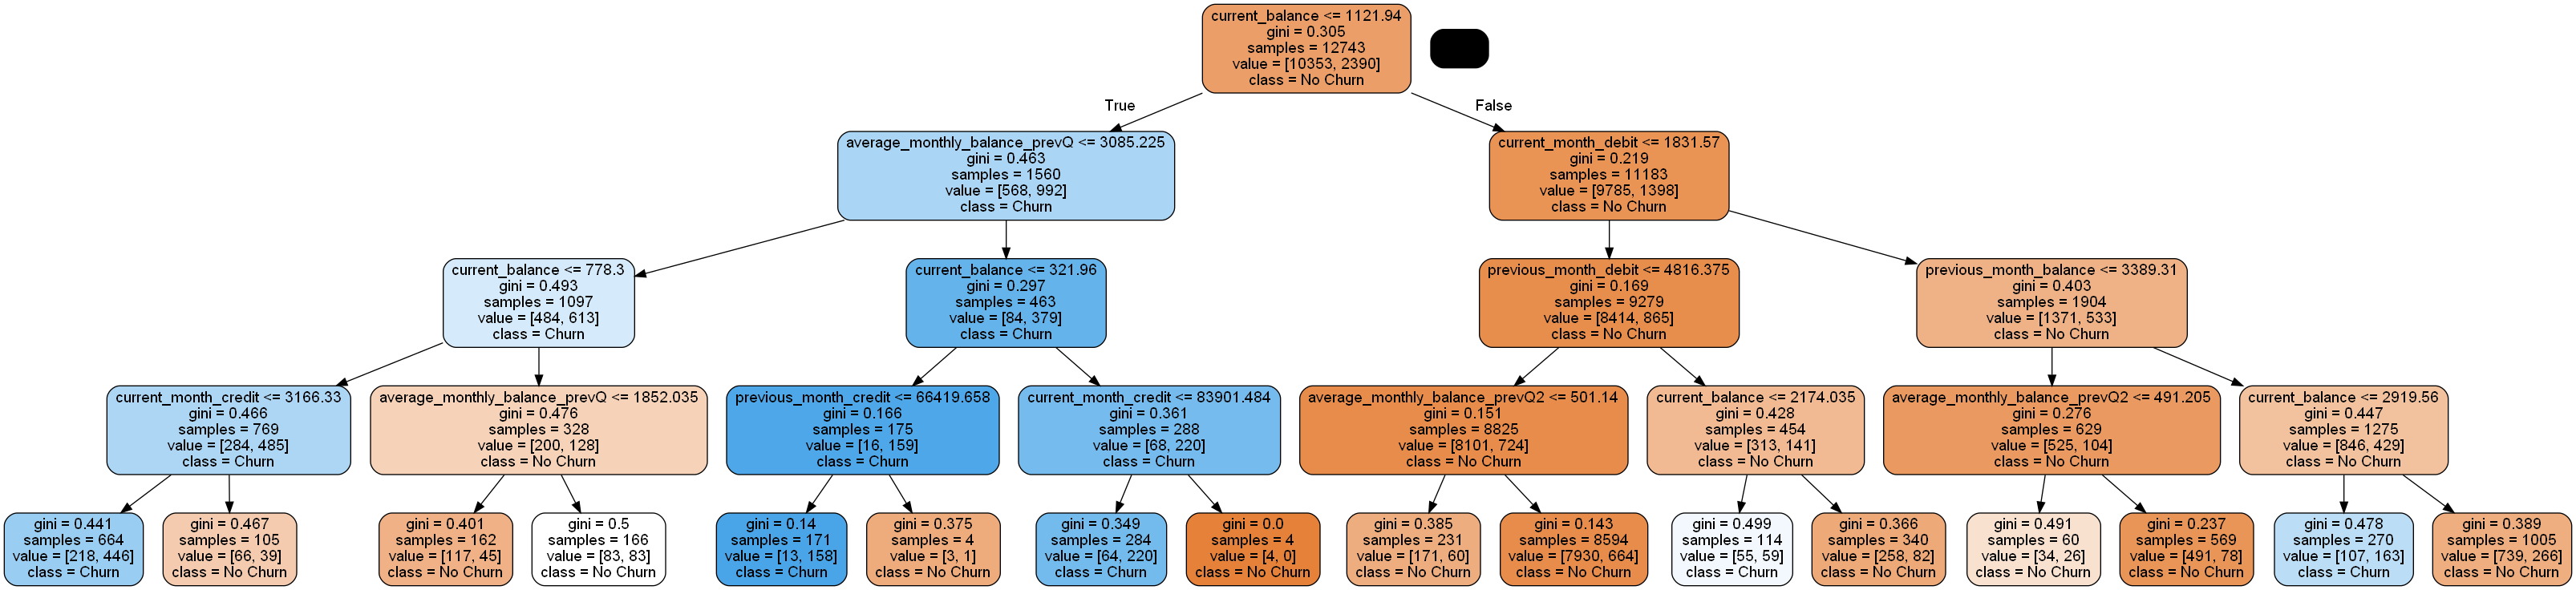

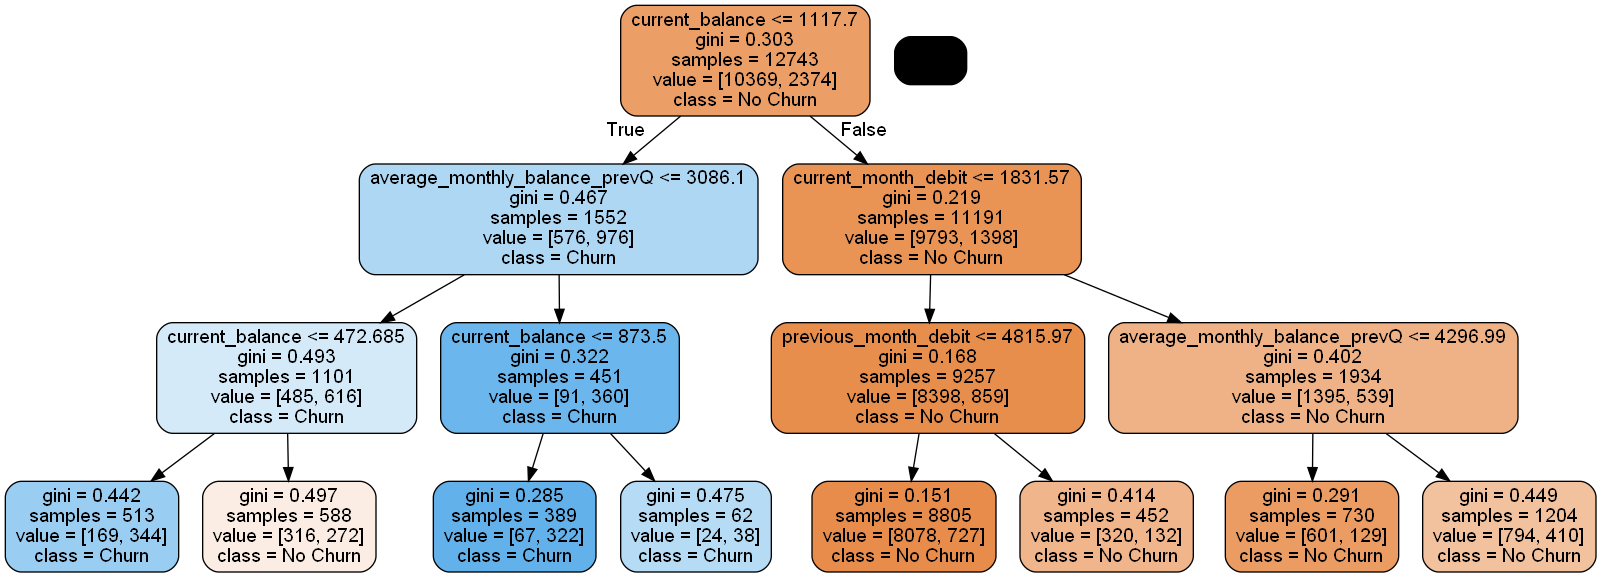

In [129]:
accuracy_score(y_train, tree_model.predict(X_train))

0.8586675037275366

In [130]:
accuracy_score(y_test, tree_model.predict(X_test))

0.8430634023854363

In [131]:
confusion_matrix(y_test, tree_model.predict(X_test))

array([[2448,  141],
       [ 359,  238]], dtype=int64)

In [132]:
y_pred = tree_model.predict(X_test)
print(classification_report(y_test, y_pred) ) #  target_names=["No Churn", "Churn"]) )

              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91      2589
         1.0       0.63      0.40      0.49       597

    accuracy                           0.84      3186
   macro avg       0.75      0.67      0.70      3186
weighted avg       0.83      0.84      0.83      3186



In [ ]:
# HW: try GaussianNB, KNeighborsClassifier, SVC

In [21]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12743 entries, 6682 to 7270
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   vintage                         12743 non-null  int64   
 1   age                             12743 non-null  int64   
 2   gender                          12743 non-null  category
 3   dependents                      12743 non-null  int64   
 4   current_balance                 12743 non-null  float64 
 5   previous_month_end_balance      12743 non-null  float64 
 6   average_monthly_balance_prevQ   12743 non-null  float64 
 7   average_monthly_balance_prevQ2  12743 non-null  float64 
 8   current_month_credit            12743 non-null  float64 
 9   previous_month_credit           12743 non-null  float64 
 10  current_month_debit             12743 non-null  float64 
 11  previous_month_debit            12743 non-null  float64 
 12  current_month_ba

In [149]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier


In [150]:
from sklearn.model_selection import cross_validate, StratifiedKFold

n_splits = 5
kfold = StratifiedKFold(n_splits=n_splits,shuffle=True, random_state=101)  # >> shuffler & spliiter 

In [151]:
models = [] 

GBDT = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=100)
models.append(('GBDT', GBDT))

AdaBoost = AdaBoostClassifier(n_estimators=100, learning_rate=1.0, random_state=100)
models.append(('AdaBoost', AdaBoost))

RandomForest = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=100)
models.append(('RandomForest', RandomForest))

In [152]:
cv_results = []
n_splits = 5
mean_train_score = []
test_scores = []
names = []

# going to cross-validate all the 3 models
for name, model in models:
    results = cross_validate(model, X, y, return_train_score=True, cv=kfold, scoring="f1")  # 'accuracy'
    cv_results.append(results)
    test_scores.append(results['test_score'] ) 
    mean_train_score.append(results['train_score'].mean().round(3) )
    names.append(name)
    print(name, ".... done!")

GBDT .... done!
AdaBoost .... done!
RandomForest .... done!


In [90]:
results_df = pd.DataFrame(test_scores, index=names, columns='CV1 CV2 CV3 CV4 CV5'.split() )
results_df['CV Mean'] = np.round(results_df.iloc[:,0:n_splits].mean(axis=1), 4)
results_df['CV Std Dev'] = np.round(results_df.iloc[:,0:n_splits].std(axis=1), 4)

results_df['Mean_Train_Score'] = mean_train_score

results_df.sort_values(by='CV Mean', ascending=False)*100

,CV1,CV2,CV3,CV4,CV5,CV Mean,CV Std Dev,Mean_Train_Score
GBDT,57.58,55.16,54.55,54.92,52.09,54.86,1.95,60.20
AdaBoost,51.73,52.45,51.01,51.55,47.84,50.91,1.80,53.70
RandomForest,36.92,37.80,35.52,34.79,35.10,36.02,1.28,38.80


In [153]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12743 entries, 54 to 6863
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   vintage                         12743 non-null  int64   
 1   age                             12743 non-null  int64   
 2   gender                          12743 non-null  category
 3   dependents                      12743 non-null  int64   
 4   current_balance                 12743 non-null  float64 
 5   previous_month_end_balance      12743 non-null  float64 
 6   average_monthly_balance_prevQ   12743 non-null  float64 
 7   average_monthly_balance_prevQ2  12743 non-null  float64 
 8   current_month_credit            12743 non-null  float64 
 9   previous_month_credit           12743 non-null  float64 
 10  current_month_debit             12743 non-null  float64 
 11  previous_month_debit            12743 non-null  float64 
 12  current_month_bala

In [30]:
# Initialize XGBoost classifier
xgb_clf = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, enable_categorical=True)

# Train the model
xgb_clf.fit(X_train, y_train)

# Make predictions and evaluate
xgb_predictions = xgb_clf.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_predictions))


XGBoost Accuracy: 0.8716258631512869


In [31]:
f1_score(y_test, xgb_predictions)

0.5864509605662286

In [33]:
# Initialize LightGBM classifier
lgb_clf = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=4)

# Train the model
lgb_clf.fit(X_train, y_train)

# Make predictions and evaluate
lgb_predictions = lgb_clf.predict(X_test)
print("LightGBM Accuracy:", accuracy_score(y_test, lgb_predictions))


[LightGBM] [Info] Number of positive: 2374, number of negative: 10369
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001339 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2921
[LightGBM] [Info] Number of data points in the train set: 12743, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.186298 -> initscore=-1.474244
[LightGBM] [Info] Start training from score -1.474244
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

In [35]:
f1_score(y_test, lgb_predictions)

0.5895153313550939

In [38]:
# Initialize CatBoost classifier
cb_clf = cb.CatBoostClassifier(n_estimators=100, learning_rate=0.1, depth=4, cat_features=["gender"], verbose=0)

# Train the model
cb_clf.fit(X_train, y_train)

# Make predictions and evaluate
cb_predictions = cb_clf.predict(X_test)
print("CatBoost Accuracy:", accuracy_score(y_test, cb_predictions))


CatBoost Accuracy: 0.8688010043942247


In [39]:
f1_score(y_test, lgb_predictions)

0.5895153313550939

# Imp. Hyperparameters for XGBoost, LightGBM, and CatBoost:


| Hyperparameter               | XGBoost                            | LightGBM                           | CatBoost                           |
|------------------------------|------------------------------------|------------------------------------|------------------------------------|
| **Learning Rate**            | `eta`                              | `learning_rate`                    | `learning_rate`                    |
| **Number of Trees**          | `n_estimators`                     | `num_iterations` or `n_estimators` | `iterations`                       |
| **Maximum Tree Depth**       | `max_depth`                        | `max_depth`                        | `depth`                            |
| **Minimum Child Weight**     | `min_child_weight`                 | `min_data_in_leaf` or `min_child_samples` | `min_data_in_leaf`              |
| **Subsample**                | `subsample`                        | `bagging_fraction`                 | `subsample` or `bagging_fraction`  |
| **Colsample by Tree**        | `colsample_bytree`                 | `feature_fraction`                 | -                                  |
| **Regularization (L1 / L2)** | `reg_alpha` / `reg_lambda`         | `lambda_l1` / `lambda_l2`          | `l2_leaf_reg` (only L2)            |
| **Tree Method**              | `tree_method` (various options)    | -                                  | `boosting_type`                    |
| **Histogram Binning**        | `max_bin` (for `hist` tree method) | `max_bin`                          | -                                  |
| **Leaf-wise Growth**         | -                                  | `leaf_growth` (enabled by default) | -                                  |
| **Handling Categorical Features** | Requires pre-processing        | Requires pre-processing            | Directly handles with `cat_features` |
| **Early Stopping**           | Supported with `early_stopping_rounds` | Supported with `early_stopping_round` | Supported with `od_wait`         |
| **Boosting Type**            | -                                  | `boosting_type` (default is `gbdt`) | `boosting_type` (various options)  |
| **Specialized Regularization** | -                                | -                                  | `model_shrink_rate`                |

These hyperparameters are the most commonly tuned ones and have a significant impact on the model's performance, generalization, and speed of training. While some hyperparameters are common across all three frameworks, each framework has its unique parameters, reflecting its underlying algorithmic differences. For instance, CatBoost's specialized handling of categorical features and LightGBM's focus on speed and efficiency with large datasets are reflected in their specific hyperparameters. 



In [46]:
models = [] 

xgb_clf = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, enable_categorical=True)
models.append(('XGBoost', xgb_clf))

lgb_clf = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=4)
models.append(('LightGBM', lgb_clf))

cb_clf = cb.CatBoostClassifier(n_estimators=100, learning_rate=0.1, depth=4, cat_features=["gender"], verbose=0)
models.append(('CatBoost', cb_clf))

In [49]:
cv_results = []
n_splits = 5
mean_train_score = []
test_scores = []
names = []

# going to cross-validate all the 5 models
for name, model in models:
    results = cross_validate(model, X, y, return_train_score=True, cv=kfold, scoring="f1")  # 'accuracy'
    cv_results.append(results)
    test_scores.append(results['test_score'] ) 
    mean_train_score.append(results['train_score'].mean().round(3) )
    names.append(name)
    print(name, ".... done!")

XGBoost .... done!
[LightGBM] [Info] Number of positive: 2390, number of negative: 10353
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001906 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2921
[LightGBM] [Info] Number of data points in the train set: 12743, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.187554 -> initscore=-1.465983
[LightGBM] [Info] Start training from score -1.465983
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

[LightGBM] [Info] Number of positive: 2389, number of negative: 10354
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002490 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2923
[LightGBM] [Info] Number of data points in the train set: 12743, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.187475 -> initscore=-1.466498
[LightGBM] [Info] Start training from score -1.466498
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [50]:
results_df = pd.DataFrame(test_scores, index=names, columns='CV1 CV2 CV3 CV4 CV5'.split() )
results_df['CV Mean'] = np.round(results_df.iloc[:,0:n_splits].mean(axis=1), 4)
results_df['CV Std Dev'] = np.round(results_df.iloc[:,0:n_splits].std(axis=1), 4)

results_df['Mean_Train_Score'] = mean_train_score

results_df.sort_values(by='CV Mean', ascending=False)*100

,CV1,CV2,CV3,CV4,CV5,CV Mean,CV Std Dev,Mean_Train_Score
LightGBM,58.04,57.40,56.03,55.57,52.99,56.01,1.96,63.80
CatBoost,58.39,55.34,55.16,56.22,51.73,55.37,2.40,58.20
XGBoost,57.38,56.22,54.90,55.21,51.58,55.06,2.17,59.70


In [51]:
# HyperPArameter Tuning using GridSearch¶

In [52]:
# STEPS FOR HP Tuning:
#     1. Identify and narrow down the transformer/scaler/algo which we want to tune..
#     2. Identify the Hyper param for that transformer/scaler/algo which we want to tune..
#     3. Create a list/array of parameter values you want to search/try-out
#     4. Create a dict of param_values you want to tune
#     5. PAss the dict to GridSearchCV function, alongwith the model (step1) & CV object.

In [53]:
# hYPRER paRAM tuning the pipiline
from sklearn.model_selection import GridSearchCV

n_estimators = np.arange(100, 550, 50)
param_grid = {'n_estimators': n_estimators}

xgb_clf = xgb.XGBClassifier(learning_rate=0.1, max_depth=3, enable_categorical=True)

grid = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, scoring='f1', cv=kfold, return_train_score=True)
grid_result = grid.fit(X, y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.563302 using {'n_estimators': 200}
0.550578 (0.019435) with: {'n_estimators': 100}
0.561014 (0.017990) with: {'n_estimators': 150}
0.563302 (0.019223) with: {'n_estimators': 200}
0.563237 (0.020858) with: {'n_estimators': 250}
0.561677 (0.019407) with: {'n_estimators': 300}
0.560963 (0.017573) with: {'n_estimators': 350}
0.557257 (0.019795) with: {'n_estimators': 400}
0.556871 (0.020822) with: {'n_estimators': 450}
0.556372 (0.021462) with: {'n_estimators': 500}


In [54]:
grid_result.best_params_, grid_result.best_score_

({'n_estimators': 200}, 0.5633024545653494)

In [55]:
grid_result.cv_results_['mean_test_score'][grid_result.best_index_]*100

56.330245456534946

In [56]:
grid_result.cv_results_['std_test_score'][grid_result.best_index_]*100

1.9222760414535511

In [57]:
grid_result.cv_results_['mean_train_score'][grid_result.best_index_]*100

62.97331112533408

In [59]:
grid_result.cv_results_['mean_test_score']

array([0.55057755, 0.56101386, 0.56330245, 0.56323703, 0.56167726,
       0.56096342, 0.55725732, 0.55687075, 0.5563721 ])

In [60]:
grid_result.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [58]:
grid_result.cv_results_

{'mean_fit_time': array([0.2032557 , 0.27785711, 0.35725274, 0.44302101, 0.45219216,
        0.48390017, 0.53855205, 0.62154322, 0.67100487]),
 'std_fit_time': array([0.03094365, 0.02453212, 0.0575351 , 0.100181  , 0.03065342,
        0.02140246, 0.03343732, 0.02492184, 0.03118629]),
 'mean_score_time': array([0.01377053, 0.02234011, 0.01755209, 0.01714869, 0.01634989,
        0.02235284, 0.02095046, 0.02053928, 0.01855154]),
 'std_score_time': array([0.00271518, 0.00686915, 0.00583507, 0.0051424 , 0.00247928,
        0.00287169, 0.00245324, 0.00325548, 0.00240996]),
 'param_n_estimators': masked_array(data=[100, 150, 200, 250, 300, 350, 400, 450, 500],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 100},
  {'n_estimators': 150},
  {'n_estimators': 200},
  {'n_estimators': 250},
  {'n_estimators': 300},
  {'n_estimators': 350},
  {'n_estimators': 400

In [155]:
final_model = grid_result.best_estimator_

NameError: name 'grid_result' is not defined

# FInal Model Trianing

In [63]:
final_model.fit(X,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [64]:
import pickle
with open('final_ensemble_model.pkl', 'wb') as handle:
    pickle.dump(final_model, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [154]:
del final_model

NameError: name 'final_model' is not defined

In [66]:
final_model

NameError: name 'final_model' is not defined

In [67]:
final_model = pickle.load(open('final_ensemble_model.pkl','rb'))